In [1]:
#0是褐矮星及其候选体，1是其他的天体
import numpy as np
import pandas as pd
from autogluon.tabular import TabularDataset, TabularPredictor
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
from autogluon.tabular import TabularDataset, TabularPredictor
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

data_path= "result_20220309_color.csv"
df=pd.read_csv(data_path) # path to colab notebook #replace this with the path to your dataset
df_use=df.iloc[:,4:11]
#print(df_use.head())

df_bd=df_use.iloc[:5111]
df_bd.tail()
print(df_bd.tail())
df_other=df_use.iloc[5111:]
df_other.head()
np.random.seed(0)
df_other_sample=df_other.sample(5500)
print(df_other_sample.head())
df_use_sample=pd.concat([df_bd,df_other_sample])
print(df_use_sample.head())
predictor = TabularPredictor.load("./dich_BD/")
df_train,df_test=train_test_split(df_use_sample,test_size=0.15,random_state=1)
y_pred = predictor.predict(df_test)
y_true= df_test['subclass']
xstick=y_true.drop_duplicates()
predictor.evaluate_predictions(y_true, y_pred)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_21576\2883514903.py:17: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(data_path) # path to colab notebook #replace this with the path to your dataset


      W1mag-W2mag  W2mag-W3mag  Jmag-Hmag  Jmag-W1mag  Jmag-W2mag  Jmag-Kmag  \
5106     0.246000     1.030000   0.610000    1.233000    1.479000   1.016000   
5107     0.245000     2.188001   0.763000    1.556999    1.801999   1.332000   
5108     0.212000     1.844001   0.721000    1.164000    1.376000   1.071000   
5109     0.180000     1.204001   0.596000    1.245999    1.426000   1.188000   
5110     0.125999     2.551001   0.960001    1.338001    1.464001   1.395001   

      subclass  
5106         0  
5107         0  
5108         0  
5109         0  
5110         0  
        W1mag-W2mag  W2mag-W3mag  Jmag-Hmag  Jmag-W1mag  Jmag-W2mag  \
279008     0.158000     1.169000   0.926000    2.012999    2.171000   
132986     0.212999     1.167001   0.499001    1.956000    2.169000   
302769     0.183000     0.999001   0.597000    1.829001    2.012000   
542695     0.263001     0.840000   0.683001    2.092000    2.355001   
315096     0.276999     2.815001   0.092000    0.928000    1.2

{'accuracy': 0.8586683417085427,
 'balanced_accuracy': 0.858670955130604,
 'mcc': 0.7172598067666319,
 'f1': 0.8611967921036398,
 'precision': 0.8638613861386139,
 'recall': 0.8585485854858549}

[[669 110]
 [115 698]]


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


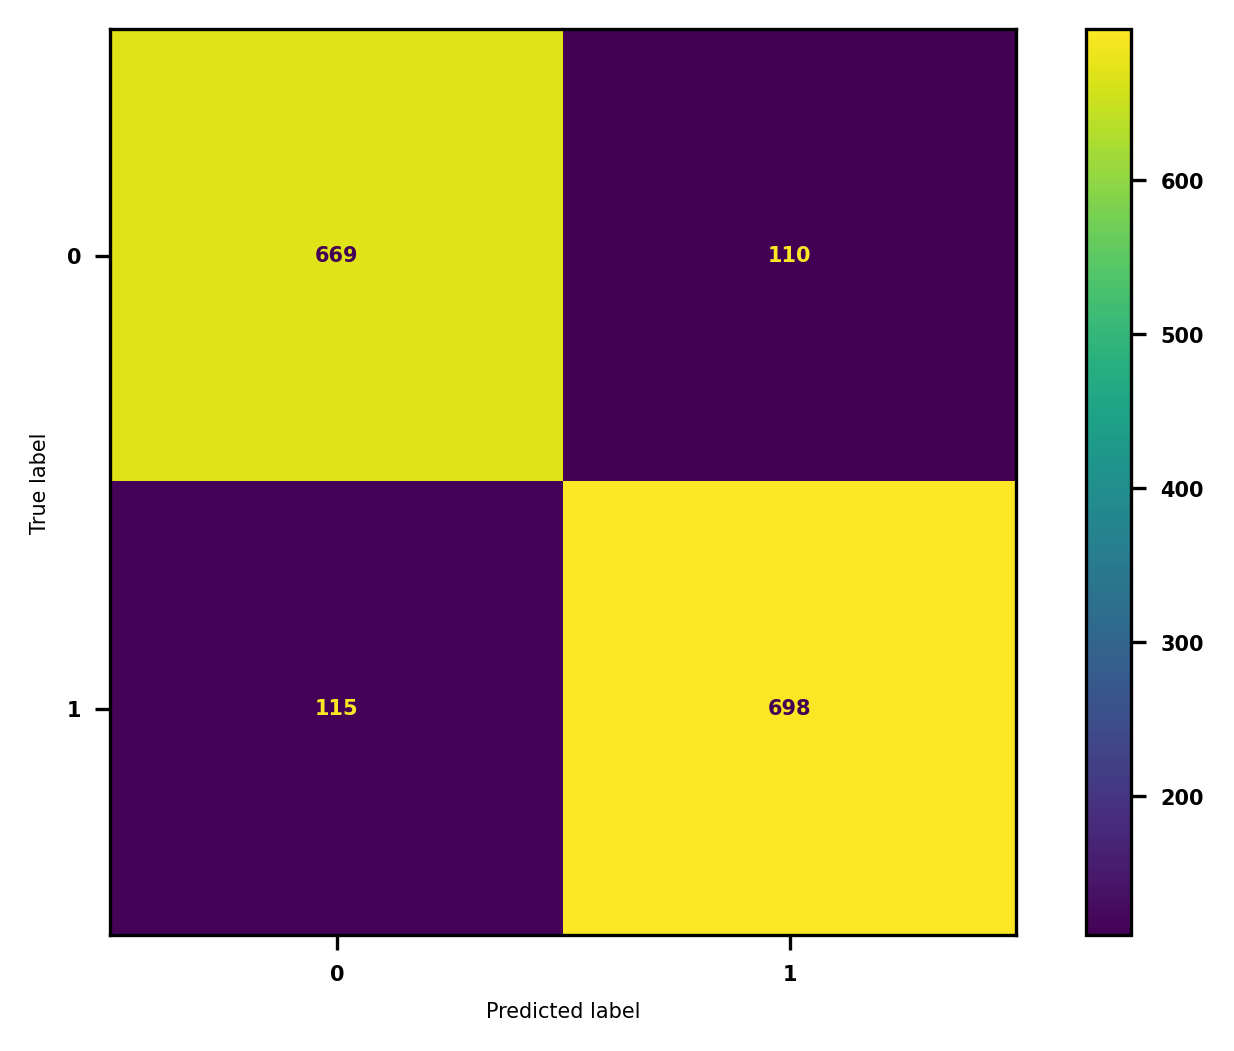

In [2]:
from sklearn.metrics import confusion_matrix
font = {'family' : 'normal',
    'weight' : 'bold',
    'size'   : 5}
plt.rc('font', **font)
plt.rcParams['savefig.dpi'] = 300  # 图片像素
plt.rcParams['figure.dpi'] = 300  # 分辨率
cm=confusion_matrix(y_true,y_pred)
print(cm)
ConfusionMatrixDisplay.from_predictions(y_true, y_pred)

[[0.85879332 0.14120668]
 [0.14145141 0.85854859]]


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


<AxesSubplot:>

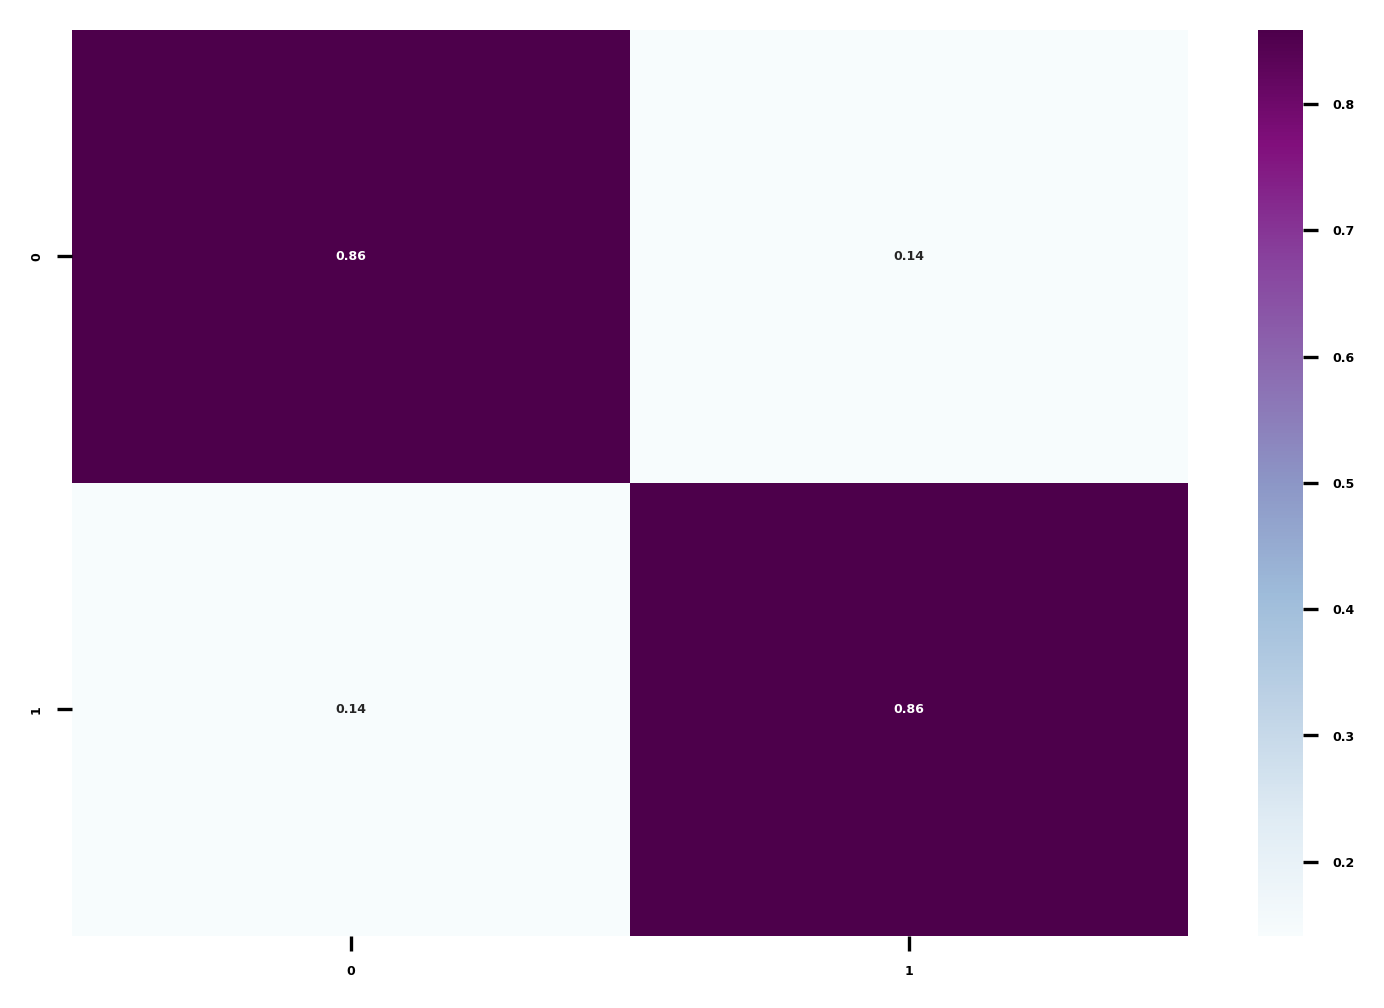

In [3]:
#混淆矩阵percentage
import seaborn as sn
cmpercent=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
print(cmpercent)
tick=xstick.sort_values()
font = {'family' : 'normal',
    'weight' : 'bold',
    'size'   : 3}
plt.rc('font', **font)
sn.heatmap(cmpercent,xticklabels=tick,yticklabels=tick, annot=True, cmap="BuPu")

In [4]:
#输出预测概率
pred_probs = predictor.predict_proba(df_test)
pred_probs.head(5)

,0,1
3773,0.513331,0.486669
309572,0.168927,0.831073
216535,0.662525,0.337475
2857,0.502763,0.497237
2779,0.902590,0.097410


In [5]:
#可解释性
predictor.feature_importance(df_test)

,importance,stddev,p_value,n,p99_high,p99_low
Jmag-W1mag,0.240000,0.030315,0.002638,3,0.413708,0.066292
Jmag-Hmag,0.107000,0.001732,0.000044,3,0.116925,0.097075
Jmag-W2mag,0.089000,0.006557,0.000902,3,0.126575,0.051425
Jmag-Kmag,0.082333,0.003055,0.000229,3,0.099839,0.064828
W2mag-W3mag,0.058667,0.017673,0.014471,3,0.159935,-0.042601
W1mag-W2mag,0.050000,0.008000,0.004213,3,0.095841,0.004159


In [6]:
#各个模型的性能
predictor.leaderboard(df_test, silent=True)

D:\conda\envs\automl\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,NeuralNetTorch,0.858668,0.882483,0.038001,0.011998,12.015663,0.038001,0.011998,12.015663,1,True,12
1,WeightedEnsemble_L2,0.858668,0.899113,0.730559,0.222005,46.775072,0.016000,0.002002,0.620936,2,True,14
2,LightGBM,0.858040,0.880266,0.010003,0.009001,2.929114,0.010003,0.009001,2.929114,1,True,4
3,NeuralNetFastAI,0.854271,0.884701,0.062002,0.023998,10.881957,0.062002,0.023998,10.881957,1,True,10
4,LightGBMXT,0.853015,0.879157,0.084991,0.018002,11.098004,0.084991,0.018002,11.098004,1,True,3
5,ExtraTreesGini,0.849874,0.881375,0.301999,0.075001,0.686903,0.301999,0.075001,0.686903,1,True,8
6,ExtraTreesEntr,0.849246,0.879157,0.202547,0.070002,0.704563,0.202547,0.070002,0.704563,1,True,9
7,RandomForestGini,0.847362,0.880266,0.185000,0.071999,1.188067,0.185000,0.071999,1.188067,1,True,5
8,RandomForestEntr,0.844849,0.880266,0.190999,0.075045,1.319018,0.190999,0.075045,1.319018,1,True,6
9,XGBoost,0.843593,0.878049,0.076999,0.015002,3.654549,0.076999,0.015002,3.654549,1,True,11


In [7]:
predict_other=predictor.predict(df_other)
predict_other.value_counts()

1    626402
0    106190
Name: subclass, dtype: int64

In [8]:
predict_other.to_csv("./predict_other.csv")